In [4]:
# all library / kullanılan tüm kütüphaneler 
import pandas as pd # pandas lib. / 
from sklearn import preprocessing # normalization / StandardScaler lib.
from sklearn.model_selection import train_test_split # train/test split lib.
from sklearn.linear_model import LinearRegression # regression lib / lineer reg.
from sklearn import metrics # metric / mean square vs. 
from sklearn.metrics import r2_score # metric / r'2 metric 
import numpy as np #numpy lib.
import re # regular exp. lib. / str split vs. 
import seaborn as sns # visualization lib. / pairplot

In [5]:
# load data / veriyi yükleme
df = pd.read_csv('US_housing.csv')

# top 10 data / ilk on veri 
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\r\nTracyport, ..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\r\nNguyenburgh, C..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\r\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\r\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\r\nDPO AE 97025


In [6]:
# find the address column / adres kolonunu ilk veri
df["Address"][0]

'208 Michael Ferry Apt. 674\r\nLaurabury, NE 37010-5101'

In [7]:
# simple algorithms(sayısal veri üzerinde basit hesaplamalar) / mean,count,min,max,standard deviation
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
# Information about data / veri hakkında bilgi 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
# remove address / adres kolonu silmek
x = df.drop(columns='Address') 
# top 5 data
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [10]:
# Scale the features / özellikleri ölçeklendirme
scaler = preprocessing.StandardScaler()

# separate features from label / etiketten ayrı özellikler
x_scaled = scaler.fit_transform(x[x.columns.values[:-1]]) #features / özellikler
x_scaled 


array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [13]:
y = df.Price.values # label / ulaşılmak istenen hedef (y)

In [14]:
#parameters / parametreler
#*arrays : X_scaled ,y İzin verilen girişler listeleri 
#test_size : 0 1 arasında olmalıdır test için ayrılması gereken veri miktarı belirlenir 
#train : modeli eğitmek için kullanılan veriler
#test : modeli test için kullanılan veri
X_train, X_test, y_train, y_test = train_test_split( x_scaled, y, test_size=0.2, random_state = 42)

In [15]:
# shape : oluşturulan listenin boyutunu verir
print(X_train.shape, X_test.shape)

(4000, 5) (1000, 5)


TRAIN MODEL

In [16]:
# model eğitme / model fit
reg = LinearRegression().fit(X_train, y_train) 

In [18]:
# Predicting the Test set results // test seti sonuçlarını tahmin etme
y_pred = reg.predict(X_test)
y_pred[0]

1308587.9269975265

In [19]:
# actual vs. estimated value / gerçek ve tahmini değerlerin karşılaştırması 
df1 = pd.DataFrame({'real': y_test, 'prediction ': y_pred})  
df1.head()

,real,prediction
0,1.339096e+06,1.308588e+06
1,1.251794e+06,1.237037e+06
2,1.340095e+06,1.243429e+06
3,1.431508e+06,1.228900e+06
4,1.042374e+06,1.063321e+06


In [18]:
# validation / doğrulama
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 eror(R^2):', r2_score(y_test, y_pred)) # 1.0 en iyi değer

Mean Squared Error (MSE): 10089009300.893988
Root Mean Squared Error (RMSE): 100444.0605555848
Mean Absolute Error: 80879.09723489443
R2 eror(R^2): 0.9179971706834331


#### Baseline / basamak 0.9165334724138281

In [20]:
df['Address'][0] # address format we have / sahip olduğumuz adres formatı

'208 Michael Ferry Apt. 674\r\nLaurabury, NE 37010-5101'

In [36]:
# regular expression(düzenli ifadeler) / re.split("",str) 
txt = df["Address"]
list(txt)

adr_split = []
for i in txt:
      adr_split.append(re.split("\s",i))
adr_split[0]

['208',
 'Michael',
 'Ferry',
 'Apt.',
 '674',
 '',
 'Laurabury,',
 'NE',
 '37010-5101']

In [37]:
# state list / eyalet listesi 
myStateAbb = []
for j in adr_split:
    myStateAbb += (j[-2:-1])
myStateAbb[0]

'NE'

In [23]:
# Number of unique state / benzersiz state sayısı
np.unique(np.array(myStateAbb)).shape

(62,)

In [25]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [26]:
# relationship between features (özellikler arası ilişki) 
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


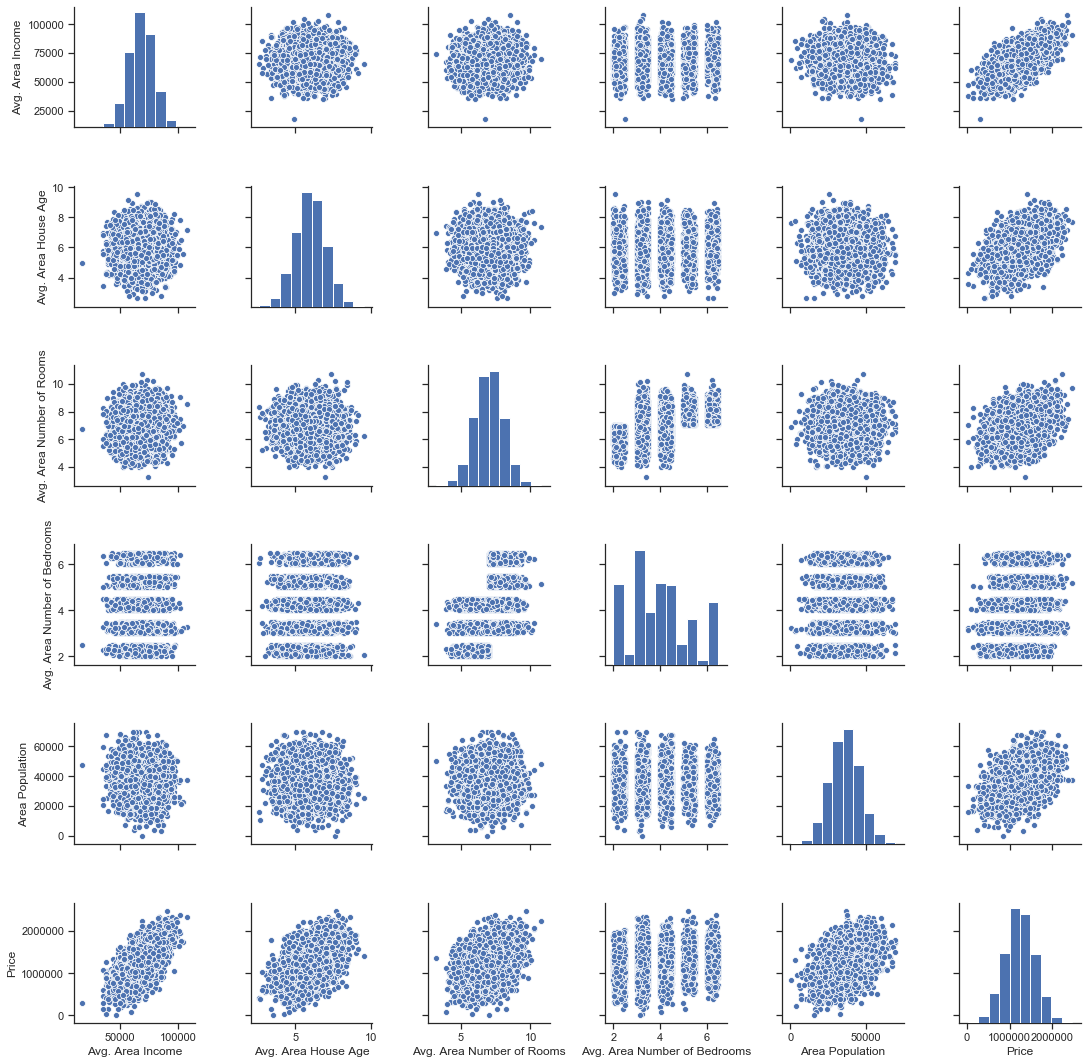

In [21]:
# visualization / görselleştirme 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

In [22]:
# axis=1 sütun demektir / remove address (adres kolonunu silme) /x1
x1 = df.drop("Address", axis = 1 ) 
x1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [23]:
#normalization / standard
scaler = preprocessing.StandardScaler()

# separate features from label
x_scaled1 = scaler.fit_transform(x1[x1.columns.values[:]])
x_scaled1

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867,
        -0.49008146],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945,
         0.77550829],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989,
        -0.49021053],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658,
        -0.570244  ],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608,
        -0.0946402 ],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464,
         0.18941143]])

In [28]:
#Avg. Area Income / Avg. Area Number of Rooms
X = x_scaled1[:,[0,2]]
X

array([[ 1.02865969,  0.02127433],
       [ 1.00080775, -0.25550611],
       [-0.68462916,  1.5162435 ],
       ...,
       [-0.48723454, -2.17026949],
       [-0.05459152,  0.14154061],
       [-0.28831272, -0.19434166]])

In [29]:
# x1 columns / kolonları
x1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [30]:
# target / hedef
y = x1.Price.values

In [31]:
# test/train verisi ayırma (data split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

In [32]:
# model training / modeli eğitme
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# estimate y values / y değerlerini tahmin etmek 
y_pred1 = reg.predict(X_test)
y_pred1[0]

1023776.4995017727

In [36]:
#r^2 validation 
print('R2 eror(R^2):', r2_score(y_test, y_pred1)) 

R2 eror(R^2): 0.5330793660836439


#### 0.5372353130002897 < 0.9165334724138281

In [37]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [38]:
#remove address / adresi silme
clnDf = df.drop("Address", axis = 1 )
clnDf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [39]:
# add stateabb / eyalet kısaltmalarını ekleme (myStateAbb)
clnDf['StateAbb'] = pd.DataFrame(myStateAbb) 
clnDf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,StateAbb
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE


In [40]:
# df türünde one hot encoding / df type one hot encoding (dfDummies)
dfDummies = pd.get_dummies(clnDf['StateAbb'], prefix = 'State')  

In [41]:
dfDummies.head() 

,State_AA,State_AE,State_AK,State_AL,State_AP,State_AR,State_AS,State_AZ,State_CA,State_CO,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#clnDf ile dfDummies birleştirme / Merging clnDf with dfDummies
clnDf = pd.concat([clnDf, dfDummies], axis=1)
clnDf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,StateAbb,State_AA,State_AE,State_AK,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#remove stateAbb / normalizasyon öncesi string değerler silinir
clnDf = clnDf.drop(columns='StateAbb') 
clnDf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State_AA,State_AE,State_AK,State_AL,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# remove Price / ulaşılmak istenen değerde normalizasyon öncesi silinir.
clnDf = clnDf.drop(columns='Price') 
clnDf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,State_AA,State_AE,State_AK,State_AL,State_AP,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,79545.458574,5.682861,7.009188,4.09,23086.800503,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# normalization / standard
scaler = preprocessing.StandardScaler()

# separate features from label
X = scaler.fit_transform(clnDf[clnDf.columns.values[:]]) # features
X

array([[ 1.02865969, -0.29692705,  0.02127433, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [ 1.00080775,  0.02590164, -0.25550611, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [-0.68462916, -0.11230283,  1.5162435 , ...,  8.58060987,
        -0.12832288, -0.12340351],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [-0.05459152, -0.44669439,  0.14154061, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [-0.28831272,  0.01521477, -0.19434166, ..., -0.11654183,
        -0.12832288, -0.12340351]])

In [46]:
y = df.Price.values # label / hedef
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [47]:
#train  test split / train test ayırmak 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(4000, 67) (1000, 67)


In [49]:
#fit / eğitmek 
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Test model / tahminleme
y_pred = reg.predict(X_test)
y_pred[0]

1305166.49256009

In [51]:
# tahini değer ve gerçek değer karşılaştırma / Estimated value and actual value comparison
df1 = pd.DataFrame({'real': y_test, 'prediction ': y_pred})  
df1.head()

,real,prediction
0,1.339096e+06,1.305166e+06
1,1.251794e+06,1.248478e+06
2,1.340095e+06,1.244238e+06
3,1.431508e+06,1.229566e+06
4,1.042374e+06,1.043678e+06


In [52]:
#R2  validation
print('R2 eror(R^2):', r2_score(y_test, y_pred)) 

R2 eror(R^2): 0.9165794730400542


### BSLİNE : 0.9165334724138281  <  0.9165794730400542

In [53]:
# remove Avg. Area Number of Bedrooms anormal graph / anormal grafik oluşturan özelliği silme ( Avg. Area Number of Bedrooms)
clnDf = clnDf.drop(columns='Avg. Area Number of Bedrooms') 
clnDf.head() 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,State_AA,State_AE,State_AK,State_AL,State_AP,State_AR,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,79545.458574,5.682861,7.009188,23086.800503,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,40173.072174,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,36882.159400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,34310.242831,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,26354.109472,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# normalization / standard
scaler = preprocessing.StandardScaler()

# separate features from label
X = scaler.fit_transform(clnDf[clnDf.columns.values[:]]) 
X

array([[ 1.02865969, -0.29692705,  0.02127433, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [ 1.00080775,  0.02590164, -0.25550611, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [-0.68462916, -0.11230283,  1.5162435 , ...,  8.58060987,
        -0.12832288, -0.12340351],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [-0.05459152, -0.44669439,  0.14154061, ..., -0.11654183,
        -0.12832288, -0.12340351],
       [-0.28831272,  0.01521477, -0.19434166, ..., -0.11654183,
        -0.12832288, -0.12340351]])

In [55]:
y = df.Price.values # label / hedef
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [56]:
#train  test split  / train test ayırmak 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(4000, 66) (1000, 66)


In [57]:
#fit / eğitmek 
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Test model 
y_pred = reg.predict(X_test)
y_pred[0]

1304249.49256009

In [59]:
#karşılaştırma
df1 = pd.DataFrame({'real': y_test, 'prediction ': y_pred})  
df1.head()

,real,prediction
0,1.339096e+06,1.304249e+06
1,1.251794e+06,1.248889e+06
2,1.340095e+06,1.246521e+06
3,1.431508e+06,1.228409e+06
4,1.042374e+06,1.045561e+06


In [60]:
#R2  validation
print('R2 eror(R^2):', r2_score(y_test, y_pred)) 

R2 eror(R^2): 0.9166814638743892


### BSLİNE : 0.9165334724138281 < 0.9165794730400542 < 0.9166814638743892